In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Error loading stopwords: Remote end closed connection
[nltk_data]     without response
[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading punkt_tab: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


False

In [3]:
reviews = pd.read_csv('tripadvisor_hotel_reviews.csv')
reviews

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [4]:
reviews_df= pd.DataFrame(reviews)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [5]:
def preprocess_review(review):
    
    # 1. Convert to lowercase
    review = review.lower()

    # 2. Remove punctuation and special characters
    review = re.sub(f"[{re.escape(string.punctuation)}]", "", review)

    # 3. Remove numbers
    review = re.sub(r"\d+", "", review)

    # 4. Tokenization
    tokens = word_tokenize(review)

    # 5. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 6. Lemmatization (or you can use stemming as an alternative)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 7. Join tokens back into a single string
    processed_review = ' '.join(tokens)
    
    return processed_review

In [6]:
reviews_df['processed_review'] = reviews_df['Review'].apply(preprocess_review)

In [7]:
print(reviews_df[['Review', 'processed_review']].head())

                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                    processed_review  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice room experience hotel monaco seattle good...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...  


In [9]:
reviews_df.to_csv('tripadvisor_hotel_reviews1.csv', index=False)

**Natural Language Processing (NLP):**

#**Lexicon-Based Sentiment Analysis**#

In [10]:
from textblob import TextBlob

In [11]:
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

In [12]:
reviews_df['sentiment'] = reviews_df['processed_review'].apply(get_sentiment)

In [13]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [18]:
reviews_df['sentiment_label'] = reviews_df['sentiment'].apply(classify_sentiment)
print(reviews_df[['Review', 'processed_review', 'sentiment', 'sentiment_label']].head())

                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                    processed_review  sentiment  \
0  nice hotel expensive parking got good deal sta...   0.208744   
1  ok nothing special charge diamond member hilto...   0.248633   
2  nice room experience hotel monaco seattle good...   0.294420   
3  unique great stay wonderful time hotel monaco ...   0.504825   
4  great stay great stay went seahawk game awesom...   0.469643   

  sentiment_label  
0        Positive  
1        Positive  
2        Positive  
3        Positive  
4        Positive  


In [19]:
reviews_df.to_csv('sentiment_analysis_results.csv', index=False)

**Visulaisation**

C:\Users\sawai\AppData\Local\Temp\ipykernel_27380\1191295112.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


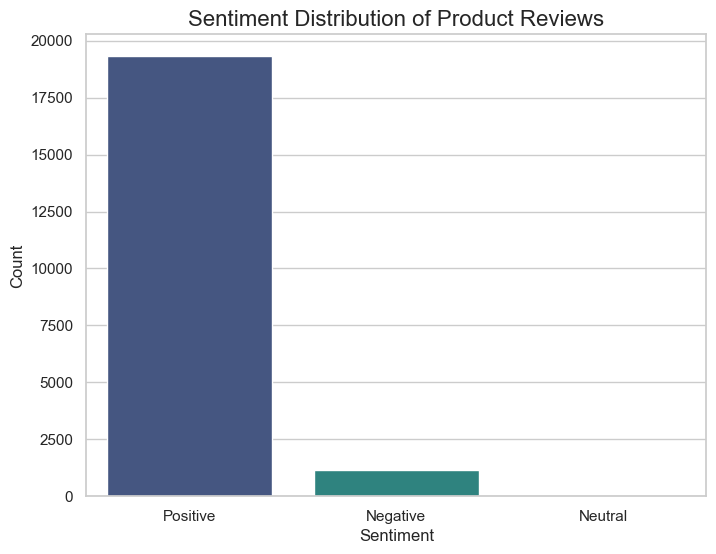

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sentiment_counts = reviews_df['sentiment_label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution of Product Reviews', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

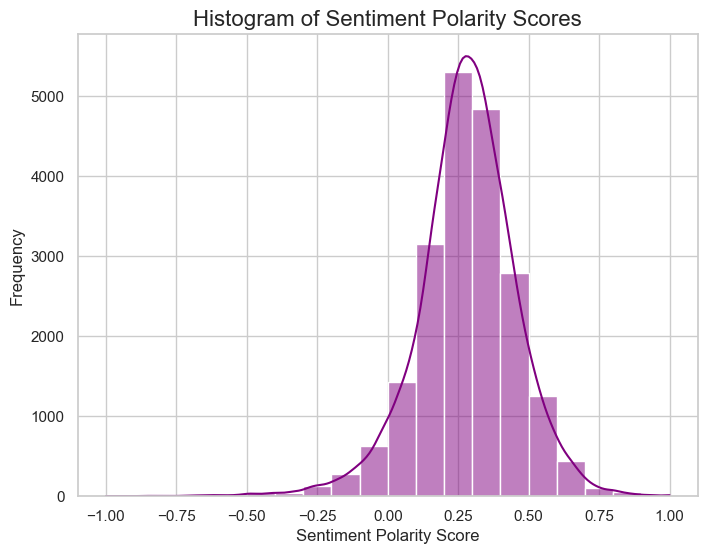

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['sentiment'], bins=20, kde=True, color='purple')

plt.title('Histogram of Sentiment Polarity Scores', fontsize=16)
plt.xlabel('Sentiment Polarity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
